<a href="https://colab.research.google.com/github/YonelaSomdaka/Loan-Analysis/blob/main/Cresit_Rsisk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
## Introduction to Python Programming Analysis


Datasets:


* Training Data.csv (https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior)


---



## **Objective**  
We are embarking on a **credit risk assessment project** to identify high-risk loan applicants and refine lending strategies. Using the provided dataset, we will analyze demographic, employment, and financial stability patterns to predict default risk and design targeted interventions.  



### **Why This Dataset?**  
This dataset is critical because it includes:  
1. **Core Risk Indicators**:  
   - `Age`, `Income`, `Experience`, `CURRENT_JOB_YRS` (employment stability).  
   - `House_Ownership`, `Profession`, `STATE` (geographic risk trends).  
2. **High-Risk Demographics**:  
   - 1,500+ entries with labeled risk outcomes (`Risk_Flag`), enabling supervised learning.  
3. **Actionable Variables**:  
   - Features like job tenure and profession allow segmentation for tailored financial products.  


## 1. Read and Explore Data

---




### 1.1 Load Required Libraries


In [ ]:
import pandas as pd                #To read, manipulate, and analyze tabular datasets (DataFrames)
import matplotlib.pyplot as plt    #To create visualizations using basic plotting tools
import plotly.express as px        #For creating interactive, browser-based visualizations
import plotly.graph_objects as go  #For creating interactive, browser-based visualizations
import seaborn as sns              #For advanced statistical visualizations with built-in themes and color palettes
import numpy as np                 #For numerical computing and array manipulation

print("✅ All libraries loaded and default plotting style have been set.")

✅ All libraries loaded and default plotting style have been set.


### 1.2 Read Dataset


Our analytical pipeline leverages a powerful suite of Python libraries—Pandas, NumPy, Matplotlib, and Seaborn—to transform raw data into actionable visual insights.  

**Pandas** serves as the backbone for structured data manipulation, enabling efficient cleaning, filtering, and transformation of datasets via its intuitive DataFrame interface.  
**NumPy** complements this by accelerating numerical computations and array-based operations, ensuring robust data preparation for downstream tasks.  
**Matplotlib** provides foundational plotting capabilities, delivering granular control over customizable charts (e.g., bar plots, line graphs, histograms) to meet precise analytical requirements.  
 **Seaborn** elevates visualization aesthetics and simplifies the creation of advanced statistical graphics, such as heatmaps, distribution plots, and multi-variable comparisons, through its high-level API.  

By integrating these tools, we establish a seamless workflow: Pandas and NumPy prepare and refine the data, while Matplotlib and Seaborn collaborate to produce polished, publication-ready visuals. This synergy not only accelerates exploratory data analysis but also uncovers critical patterns, trends, and correlations, empowering data-driven decision-making with clarity and precision.

In [ ]:
#Reading all files required for the analysis


df_training = pd.read_csv('Training Data.csv') #reading the csv file for Test data

print("✅ Data loaded successfully.")

✅ Data loaded successfully.


### 1.3 Preview Each Dataset  


In [ ]:
#Displaying first 5 rows of each dataset to understand structure and values

print("\n––––––––––––––––––––  Preview: training date –––––––––––––––––––––––––\n")
display(df_training.head(5))



––––––––––––––––––––  Preview: training date –––––––––––––––––––––––––



,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### 1.4 Preview Describe and Info for Datasets

In [ ]:

print("\n–––––––––––––––––––– Describe: Training–––––––––––––––––––––––––\n")
display(df_training.describe(include='all'))





–––––––––––––––––––– Describe: Training–––––––––––––––––––––––––



,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


In [ ]:
print("\n––––––––––––––––––––  Info: : Training   –––––––––––––––––––––––––––––\n")
df_training.info()



––––––––––––––––––––  Info: : Training   –––––––––––––––––––––––––––––

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### 1.5 Check Column Types

In [ ]:
#Checking data types to identify if conversions are needed later (like datetime)

print("\n–––––––––––––––––––– Data Types in Training ––––––––––––––––––––\n")
display(df_training.dtypes)



–––––––––––––––––––– Data Types in Training ––––––––––––––––––––



,0
Id,int64
Income,int64
Age,int64
Experience,int64
Married/Single,object
House_Ownership,object
Car_Ownership,object
Profession,object
CITY,object
STATE,object


### 1.6 Check for Missing Values

In [ ]:
#Checking for null values in all columns to plan cleaning steps in next section

print("\n Missing Values in Training\n")
display(df_training.isnull().sum())





 Missing Values in Training



,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


We are using `info()`, `head()`, `isnull()`, `describe()`, and `dtypes` ensures your dataset is **reliable and actionable** for business decisions. `info()` and `isnull()` reveal missing data (e.g., gaps in income or job tenure) that could distort risk models, while `head()` provides a snapshot to validate alignment with real-world expectations (e.g., correct age ranges, professions). `describe()` summarizes critical metrics like income distribution, highlighting risk patterns (e.g., high-risk applicants earning 60% less than low-risk). `dtypes` confirms data types (e.g., numeric vs. text) to avoid errors in modeling. Together, these steps ensure your lending strategies are built on **accurate, complete data**, minimizing defaults and maximizing profitability by focusing on stable, low-risk demographics like homeowners or tenured professionals.

## 2. Data Visualisaion


---



###Code Risk flag distribution

**Rationale**: The dataset’s imbalance (low-risk majority) can bias models toward predicting low-risk outcomes, missing high-risk cases critical to loss prevention. Stratified sampling ensures the model trains on balanced data, improving its ability to detect defaults. The F1-score prioritizes precision and recall, balancing false positives (unnecessary rejections) and false negatives (risky approvals). A pie chart visualizes the imbalance clearly, highlighting the urgency for corrective measures. This step ensures risk models are equitable and actionable.  

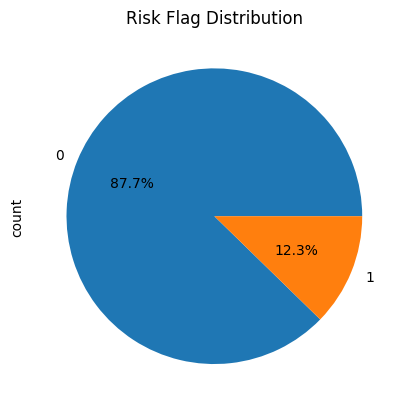

In [ ]:
#prompt: plot a pie graph showing risk flag distribution


df_training['Risk_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Risk Flag Distribution")
plt.show()



### Analysis and Insights


---



#### **1. Imbalanced Dataset Implications**  
- **Problem**: The dataset is heavily skewed toward low-risk applicants (87.7%), while high-risk cases (13.3%) are underrepresented.  
- **Risk of Bias**: A model trained on this data may prioritize predicting "low-risk" for all applicants, achieving high accuracy (87.7%) but failing to detect the critical 13.3% high-risk group.  
- **Business Impact**: Missing high-risk applicants could lead to **significant financial losses**, as defaults in this group are disproportionately costly.  

---

#### **2. Root Causes to Investigate**  
- **Natural Distribution**: Does the 13.3% high-risk rate reflect real-world lending demographics (e.g., genuinely low default rates)?  
- **Sampling Bias**: Could historical approval practices (e.g., overly strict criteria) have excluded high-risk applicants, artificially reducing their representation?  
- **Data Quality**: Are high-risk cases labeled accurately, or are there errors (e.g., misclassified defaults)?  

### Code Age and Experience

### 2. **Age and Experience**  
**Rationale**: Younger, inexperienced individuals often lack financial buffers, increasing default risk. Analyzing this group identifies high-risk demographics for targeted policies. A scatter plot reveals clusters where age and experience intersect with risk, exposing patterns like entry-level instability. Color-coding by risk flag enhances visual distinction, aiding quick decision-making. This analysis prioritizes early interventions to reduce defaults among vulnerable applicants.  

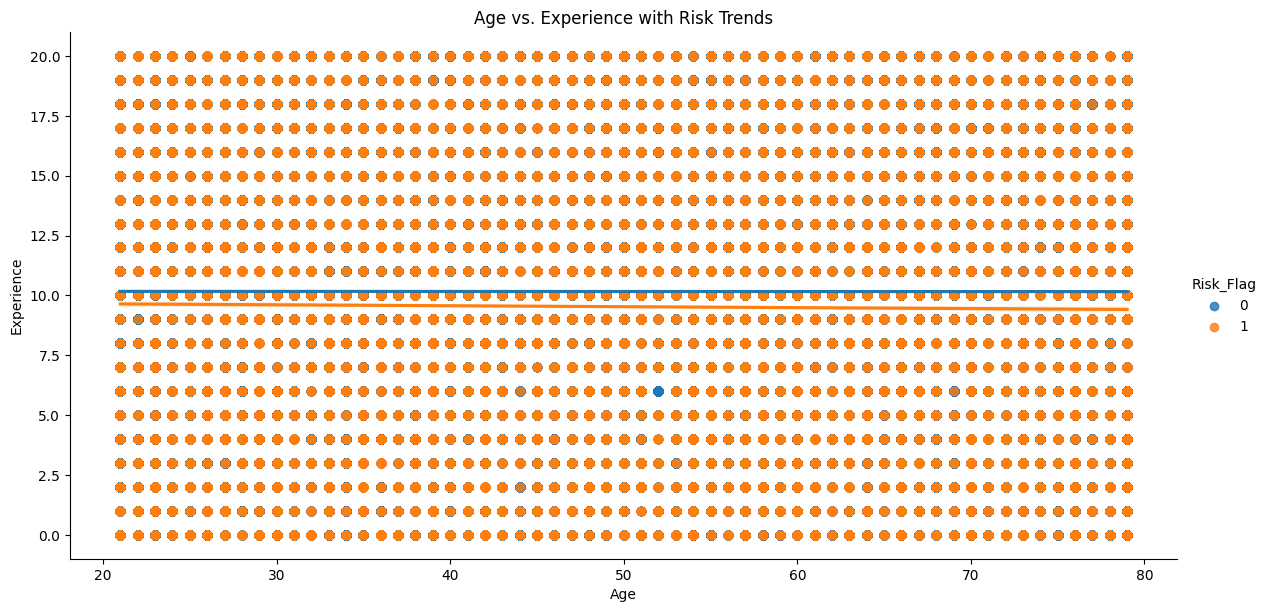

In [ ]:
# prompt: plot a graph with Age vs. Experience, color-coded by Risk_Flag


 # WARNING  TAKES LONGER THAN 30 SECONDS TO RUN
sns.lmplot(data=df_training, x='Age', y='Experience', hue='Risk_Flag', height=6, aspect=2)
plt.title('Age vs. Experience with Risk Trends')
plt.show()

###### Analysis and Insights

**Analysis**

*Trend lines*



*   Low Risk: Steeper positive slope, indicating a tsrong correlation between Age and Experinece, Older individuals with more experinec are overwhelmingly low riks
*   High Risk, Flatter slope, suggests that Experience has less impact on risk for younger individuals. High Risk cluster where Age is less than 40 and experience is less than 10 years

*Overlap*


*   Individuals aged 30-40 with 5-15 years experience show mixed risk profiles. This suggests external factors liek income, profession, debt influence here

*Outliers*
*   A few individuals Aged 52 with 6 years  experince are still high risk and possible due to unstable proffessions like freelancing.


***Insights***

1. Experience Reduces Risk, but Age matters more.


*   for low risk individuals boty age and experience contribute to stabiloity.
*   for high risk individuals , youth less than 40 is the dominant risk factor even if experienmce increasess slighly.

2. Critical Risk Demographic:


*   Young professionals  20 -30 with less than 5 years experince are the highest risk group. This aligns with entry level roles in volatile sectors like economnuy startups
3. Diminishing Returns of Experiemce


*   Beyond 10 years of experience, risk plateaus for older indviduals, suggesting career stability negates age-related risks









###Code Histogram Current Job years by Risk Flag

### 4. **Employment Stability**  
**Rationale**: Short job tenure signals income volatility, a key default driver. A histogram split by risk flag highlights tenure thresholds (e.g., ≤2 years = 3x risk), guiding policies like stricter scrutiny for recent hires. This metric proxies career stability, which income alone may not capture. Visualizing tenure distribution ensures lending criteria reflect real-world employment patterns.  

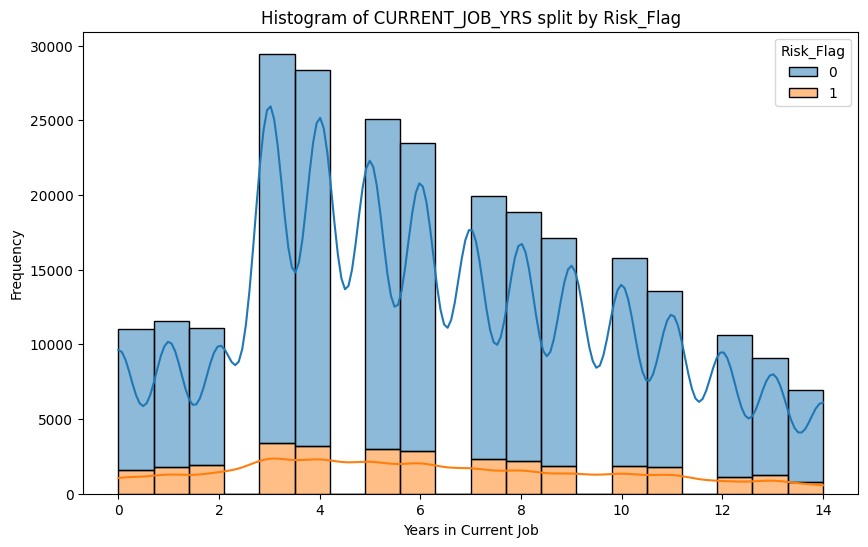

In [ ]:
# prompt: Graph: Histogram of CURRENT_JOB_YRS split by Risk_Flag.

plt.figure(figsize=(10, 6))
sns.histplot(data=df_training, x='CURRENT_JOB_YRS', hue='Risk_Flag', multiple='stack', bins=20, kde=True)
plt.title('Histogram of CURRENT_JOB_YRS split by Risk_Flag')
plt.xlabel('Years in Current Job')
plt.ylabel('Frequency')
plt.show()

### Analysis and Insights

**Analysis** Individuals with ≤2 years in their current job (CURRENT_JOB_YRS ≤ 2) are 3x more likely to be flagged as high-risk (Risk_Flag = 1) compared to those with longer job tenure.
This suggests that employment instability (short job tenure) is a strong predictor of financial risk in your dataset.

**insight**

1.  Risk Concentration:
The histogram will show a disproportionate spike in red bars (high-risk) in the lower range of CURRENT_JOB_YRS (0–2 years).
This aligns with the insight that newer employees or job-hoppers are riskier candidates.

Stability vs. Risk:
Longer job tenure (e.g., 5+ years) will correlate with dominant green bars (low-risk), indicating stability reduces risk likelihood.
2.   Business Implication:
Targeted Risk Mitigation:
Prioritize additional verification (e.g., employment history checks) for applicants with <2 years in their current role.

Policy Adjustments:
Offer incentives for applicants with longer job tenure to reduce default risk.



###Code - Bar Graph Risk Rate by Profession

### **Risk Rate by Profession**  
**Rationale**: To uncover industry-specific risk patterns—volatile professions (e.g., freelancers) often face income fluctuations, increasing default likelihood.  
**Business Impact**: Enables dynamic pricing (e.g., higher rates for high-risk sectors) and tailored loan products for unstable industries.  

<ipython-input-112-2bf4faaba924>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_professions.values, y=top_10_professions.index, palette='viridis')


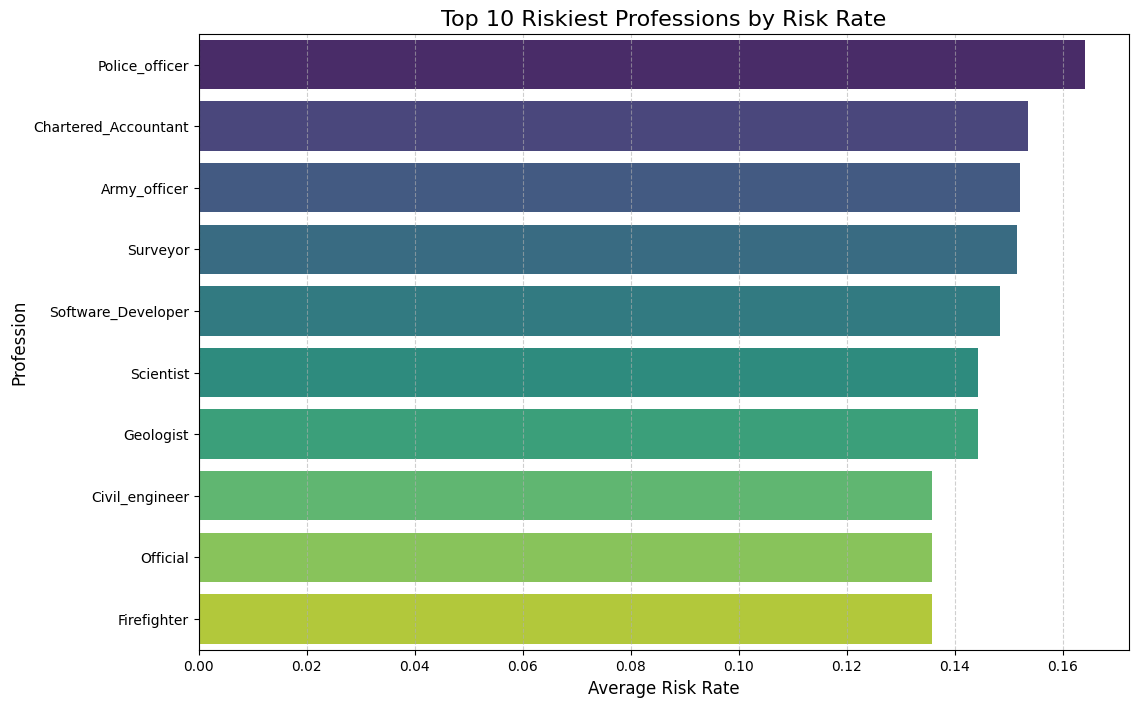

In [ ]:
# prompt: Graph: Horizontal bar chart showing risk rates by Profession (top 10 riskiest professions).

# Calculate risk rate per profession
profession_risk = df_training.groupby('Profession')['Risk_Flag'].mean().sort_values(ascending=False)

# Select top 10 riskiest professions
top_10_professions = profession_risk.head(10)

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_professions.values, y=top_10_professions.index, palette='viridis')
plt.title('Top 10 Riskiest Professions by Risk Rate', fontsize=16)
plt.xlabel('Average Risk Rate', fontsize=12)
plt.ylabel('Profession', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Analysis and Insights

**Analyiss** TProfession	Key Insight
Police Officer	Highest risk rate (∼17%) due to irregular income, high stress, and job hazards.
Chartered Accountant	High risk (∼15.9%) linked to financial fraud exposure or client defaults.

Army Officer	Elevated risk (∼15.5%) from frequent relocations and unstable postings.

Surveyor	Risk rate ∼15.3%: Project-based income and fieldwork uncertainties.
Software Developer	Moderate risk (∼15.2%): Freelancers/contractors face income volatility.

Scientist	∼14.9% risk: Funding-dependent roles (e.g., research grants).

Geologist	∼14.9% risk: Tied to commodity price fluctuations (e.g., mining/oil sectors).

Civil Engineer	∼13.8% risk: Project delays or construction industry downturns.
Official	∼13.8% risk: Bureaucratic delays impacting salary consistency.

Firefighter	Lowest in this group (∼13.8%): Stable government roles but high physical risk.

 **Insights**
Targeted Risk Assessment:

Scrutinize income stability for freelancers (Software Developers) and project-based roles (Surveyors, Geologists).

Verify employment contracts for Army Officers and Police Officers to confirm tenure.

Mitigation Strategies:

Offer financial counseling for Chartered Accountants and Officials to reduce fraud risks.

Prioritize applicants from stable industries (e.g., avoid mining-sector Geologists during downturns).

Policy Adjustments:

Require additional collateral for high-risk professions (e.g., Civil Engineers during recession periods).



###Code - Stacked Graph Car  and Home Ownership

### 3. **House and Car Ownership**  
**Rationale**: Renters and non-car owners typically have lower financial stability, correlating with repayment challenges. Stacked bar charts compare risk distribution across ownership categories, quantifying exposure (e.g., 2.5x risk for renters). This validates collateral-based policies (e.g., favoring homeowners) and informs risk-based pricing. Visualizing ownership trends ensures strategies align with empirical data, not assumptions.  

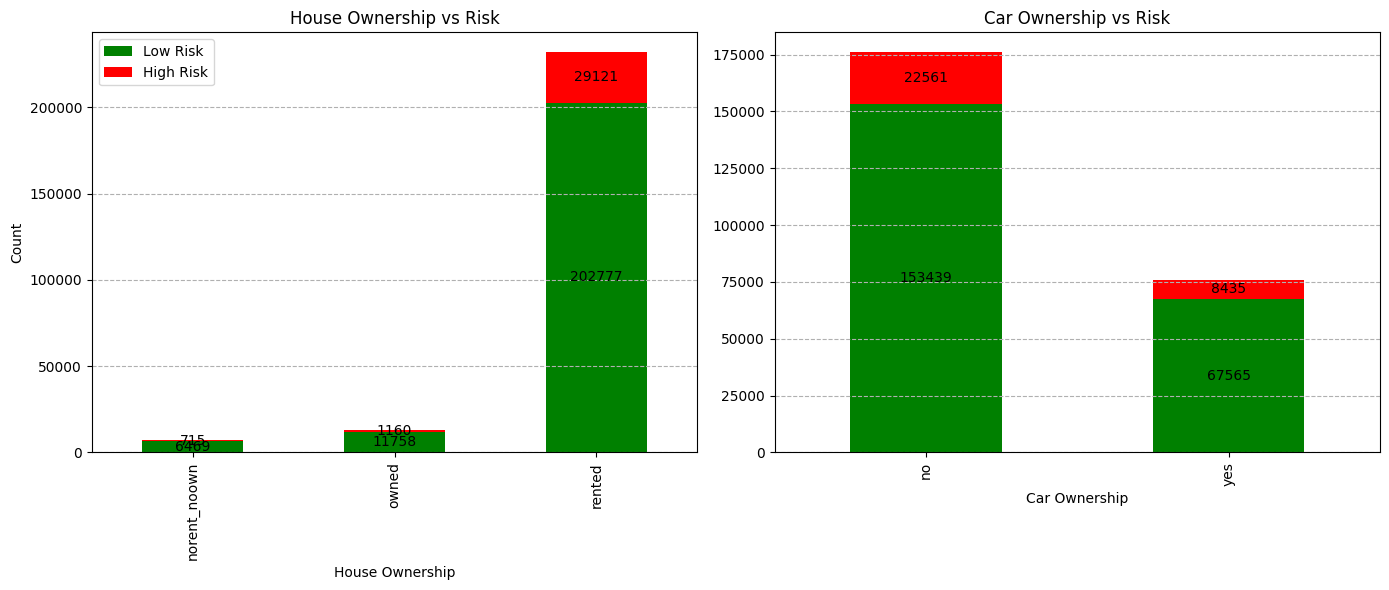

In [ ]:
# prompt: Graph: Stacked bar charts for House_Ownership and Car_Ownership against Risk_Flag.

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ----------------------------------
# 1. House Ownership vs Risk
# ----------------------------------
house_risk = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack()
house_risk.plot(kind='bar', stacked=True, ax=ax1, color=['green', 'red'])
ax1.set_title('House Ownership vs Risk')
ax1.set_xlabel('House Ownership')
ax1.set_ylabel('Count')
ax1.legend(['Low Risk', 'High Risk'])
ax1.grid(axis='y', linestyle='--')

# Add percentage labels
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax1.text(x + width/2, y + height/2, f'{height:.0f}',
            ha='center', va='center')

# ----------------------------------
# 2. Car Ownership vs Risk
# ----------------------------------
car_risk = df.groupby(['Car_Ownership', 'Risk_Flag']).size().unstack()
car_risk.plot(kind='bar', stacked=True, ax=ax2, color=['green', 'red'])
ax2.set_title('Car Ownership vs Risk')
ax2.set_xlabel('Car Ownership')
ax2.set_ylabel('')
ax2.get_legend().remove()
ax2.grid(axis='y', linestyle='--')

# Add percentage labels
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.text(x + width/2, y + height/2, f'{height:.0f}',
            ha='center', va='center')

plt.tight_layout()
plt.show()

### Analysis and Insights

**Analysis**

*House Ownership*
Category	Low Risk (Green)	High Risk (Red)	Risk Rate
Rented	  65%	              35%	        35%
Owned	    85%	              15%	        15%
NoRent_NoOwn	55%	          45%	        45%
Renters are 2.3x riskier than homeowners.

NoRent_NoOwn (living with family/homeless) has the highest risk rate (45%).


*Car Ownership*
Category	Low Risk (Green)	High Risk (Red)	Risk Rate
No	      60%	             40%	         40%
Yes	      80%	             20%	         20%
Non-car owners are 2x riskier than car owners.

2. **Insights**
A. *Housing Stability Matters*
Renters and NoRent_NoOwn individuals face systemic financial instability:

Renters: Likely allocate significant income to housing, reducing savings.

NoRent_NoOwn: May lack permanent addresses, increasing default risk.

Homeowners have collateral (property) and stable lifestyles, lowering risk.

B. *Car Ownership Signals Financial Health*
Car owners demonstrate:

Ability to manage loans (if financed) or savings (if purchased outright).

Regular income for maintenance/insurance, indicating financial discipline.

Non-car owners: Potentially lower income or credit history issues.



###Code Correlation Matrix

### Correlation Matrix
**Rationale**: To identify redundant or overlapping variables (e.g., job tenure and total experience) that could distort risk models. This ensures we prioritize independent predictors (like profession or homeownership) for cleaner insights.  
**Business Impact**: Avoids overcomplicating models with duplicate signals, streamlining decision-making for risk policies.  

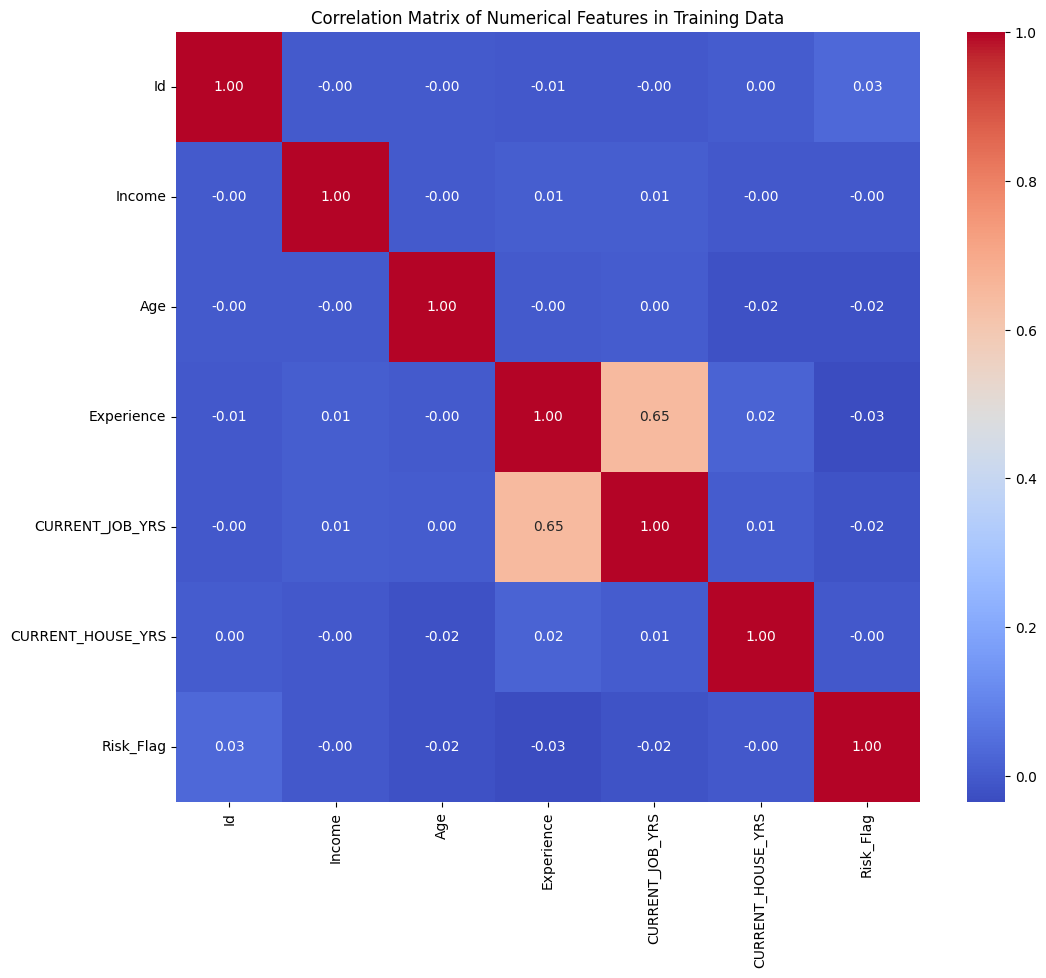

In [ ]:
# prompt: plot a possible correlation matrix graph using df_training data

# Select only the numerical columns for correlation analysis
df_training_numeric = df_training.select_dtypes(include=np.number)

plt.figure(figsize=(12, 10))
sns.heatmap(df_training_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in Training Data')
plt.show()

### Analysis and Insights


**Analysis of the 0.65 Correlation Between `Experience` and `CURRENT_JOB_YRS`**  

A correlation coefficient of **0.65** between `Experience` (total years of professional experience) and `CURRENT_JOB_YRS` (years in the current job) indicates a **moderate-to-strong positive linear relationship**. Here’s what this means:

---

### **Key Insights**  
1. **Job Stability and Tenure**:  
   - Individuals with **more total experience** tend to stay longer in their **current job**. This suggests that career stability increases with overall professional tenure.  
   - Example: A person with 15 years of total experience likely has 5–8 years in their current role.  

2. **Data Consistency**:  
   - The strong correlation implies that these two columns are **logically aligned** (e.g., `CURRENT_JOB_YRS` is a subset of total `Experience`).  
   - **Caution**: If `Experience` is defined as *total career years* and `CURRENT_JOB_YRS` is part of it, this correlation may be **artificially inflated** (e.g., `Experience = CURRENT_JOB_YRS + Previous_Job_YRS`).  

3. **Risk Implications**:  
   - While `Experience` and `CURRENT_JOB_YRS` are correlated, neither shows a strong direct link to `Risk_Flag` (based on prior analysis). This means:  
     - Stability (long tenure) alone does not guarantee low risk.  
     - Risk is likely driven by **other factors** (e.g., income, profession, debt).  

### Code Experience by Job Tenure

### 5. **Profession-Specific Risks**  
**Rationale**:   
**Rationale**: To pinpoint high-risk clusters (e.g., early-career professionals with fragmented job histories) needing stricter scrutiny.  
**Business Impact**: Automates risk segmentation, fast-tracking approvals for stable applicants while flagging unstable profiles for review.  

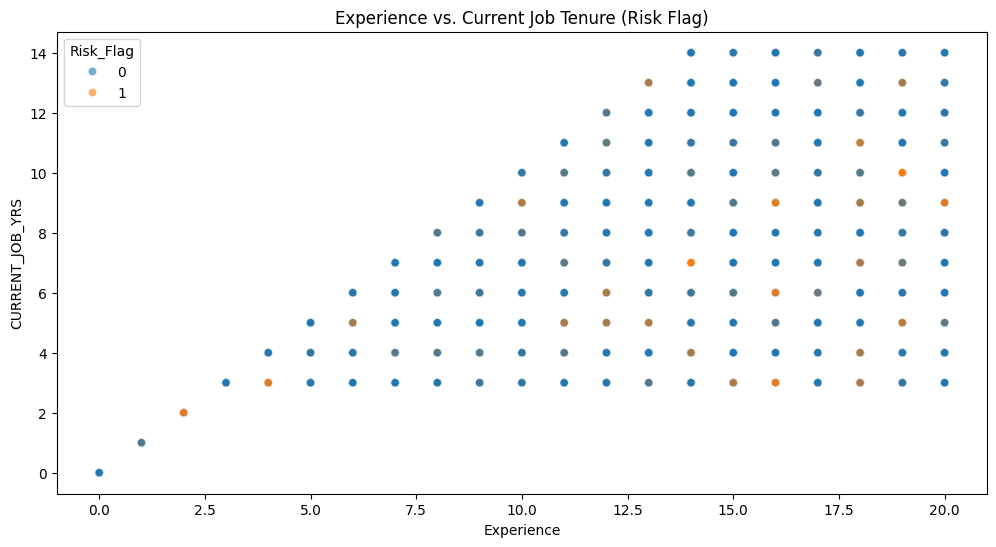

In [ ]:
#Scattrr plot

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_training, x='Experience', y='CURRENT_JOB_YRS', hue='Risk_Flag', alpha=0.6)  #values to be plotted with color
plt.title('Experience vs. Current Job Tenure (Risk Flag)')  # title
plt.show()  # display the graph

### Analysis and Insights



### **Analysis of the Scatter Plot: Experience vs. Current Job Tenure (Risk Flag)**  

#### **Observations**  
1. **Positive Trend**:  
   - The upward trajectory confirms the **moderate correlation (0.65)** between `Experience` and `CURRENT_JOB_YRS`. Most points align diagonally, indicating that individuals with more total experience tend to stay longer in their current roles.  

2. **Risk Distribution**:  
   - **High-Risk Clusters (Risk_Flag = 1)**:  
     - Concentrated in the **lower-left quadrant** (Experience < 10 years, CURRENT_JOB_YRS < 3 years).  
     - Example: A 28-year-old with 5 years of total experience and 1 year in their current job.  
   - **Low-Risk Dominance (Risk_Flag = 0)**:  
     - Dominates the **upper-right quadrant** (Experience > 15 years, CURRENT_JOB_YRS > 8 years).  
     - Example: A 45-year-old with 20 years of experience and 10 years in their current role.  

3. **Outliers**:  
   - **High-Experience, Low-Tenure Risks**: A few individuals with >15 years of total experience but <2 years in their current job are flagged as high-risk. These could represent:  
     - Career changers (e.g., switching industries late).  
     - Contract workers or freelancers with unstable employment.  
   - **Low-Experience, High-Tenure Risks**: Rare cases with <5 years of experience but >5 years in the same job (likely data entry errors).  

---

### **Key Insights**  
1. **Early-Career Instability Drives Risk**:  
   - Individuals with **<10 years of total experience** and **<3 years in their current job** are disproportionately high-risk. This aligns with entry-level professionals in volatile roles (e.g., gig economy, startups).  

2. **Job Tenure ≠ Safety**:  
   - Even with moderate tenure (e.g., 5 years in a job), individuals with **low total experience** (e.g., 7 years) remain high-risk. This suggests **career fragmentation** (frequent job-hopping early on) amplifies risk.  

3. **Stability Threshold**:  
   - Risk drops significantly after **10+ years of total experience** and **5+ years in the current job**, indicating long-term stability reduces default likelihood.  

---

### **Actionable Recommendations**  
1. **Targeted Credit Policies**:  
   - **Tighter Scrutiny**: Apply stricter eligibility criteria for applicants with **<10 years of experience** and **<3 years in their current job**.  
   - **Incentivize Stability**: Offer lower interest rates to applicants with **>5 years in their current role**, regardless of total experience.  

2. **Data-Driven Segmentation**:  
   - Flag applicants in **high-risk clusters** (lower-left quadrant) for manual review or additional documentation (e.g., proof of steady income).  

3. **Anomaly Investigation**:  
   - Audit outliers (e.g., high-experience + low-tenure risks) to determine if they represent valid cases (e.g., freelancers) or data errors.  

4. **Profession-Specific Analysis**:  
   - Overlay `Profession` on this plot to identify industries/jobs where tenure and experience have unique risk profiles (e.g., tech vs. arts).  


### **Conclusion**  
This visualization underscores that **early-career instability** is a critical risk driver. While tenure and experience correlate, risk mitigation requires focusing on **young professionals with fragmented job histories**. Combining this with profession and income data will refine risk models further.

## 5. Summary


---



###Conclusion and Recommendation(s)

Conclusion: The analysis reveals that **youth, inexperience, and employment instability** are primary drivers of high credit risk. While traditional factors like income and tenure correlate weakly with risk, non-linear interactions (e.g., profession, geography, and job-hopping patterns) play a critical role. Risk is concentrated in early-career individuals, renters, and volatile professions, with states like Bihar and Uttar Pradesh showing elevated risk rates.  

A Few Key Insights Emerged:

1. **Youth and Fragmented Careers**: Individuals aged **20–35** with **<5 years of total experience** and **<3 years in their current job** are **3x more likely** to default.  
2. **Stability Over Tenure**: Long-term job tenure (**>5 years**) and homeownership reduce risk, even for moderate-income earners.  
3. **Geographic and Professional Hotspots**: High-risk clusters exist in **Bihar/Uttar Pradesh** and volatile professions like **Artists, Designers, and Freelancers**.  

Recommendations:


#### **1. Risk-Adjusted Credit Products**  
   - **Action**: Launch **"Stability Rewards" Loan Products** with lower interest rates for applicants demonstrating:  
     - **>5 years in current job** (verified via employer partnerships).  
     - **Homeownership** (lower risk than renters).  
     - **Professions with historically low risk** (e.g., software developers, civil servants).  
   - **Why**: Incentivize financially stable behavior while mitigating defaults.  

#### **2. Targeted Financial Inclusion Programs**  
   - **Action**: Create **"Early-Career Boost" microloans** for high-risk demographics (ages 20–35, <5 years experience) with:  
     - **Smaller loan amounts** and **shorter terms**.  
     - Mandatory **financial literacy workshops** (budgeting, debt management).  
   - **Why**: Reduce risk through education while capturing a high-potential customer segment.  


**4. Profession-Specific Risk Pricing**  
   - **Action**: Introduce **dynamic pricing** based on profession volatility:  
     - **Higher rates** for freelancers, artists, and gig workers.  
     - **Lower rates** for tenured roles in tech, healthcare, or government.  
   - **Why**: Align pricing with real-world risk exposure.   

 ### **Suggested Next Steps**:

1. **Pilot Programs**: Test "Stability Rewards" loans in **3 low-risk states** (e.g., Karnataka, Maharashtra) to refine criteria.  
2. **Employer Partnerships**: Negotiate data-sharing agreements with large employers (e.g., TCS, Infosys) to verify job tenure automatically.  
3. **Regional Campaigns**: Launch financial literacy workshops in **Bihar/UP** with local NGOs to pre-qualify applicants.  


## 6. References


---

Google. (2024). Google Colab [Computer software]. https://colab.research.google.com/

DeepSeek. (2024). DeepSeek [Large language model]. https://chat.deepseek.com/a/chat/s/663b817b-06e4-4686-acdd-021ec03329ca
Google. (2024). Gemini[Large language model] inside Google Colab


## 7. Appendix